In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("notebooks_final/Data/hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [43]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [44]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

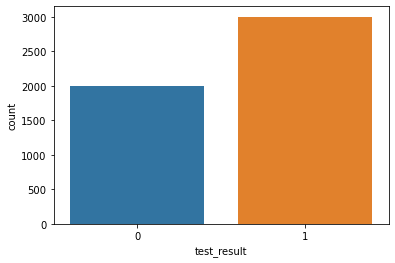

In [45]:
sns.countplot(x="test_result", data=df)

<AxesSubplot:xlabel='test_result', ylabel='age'>

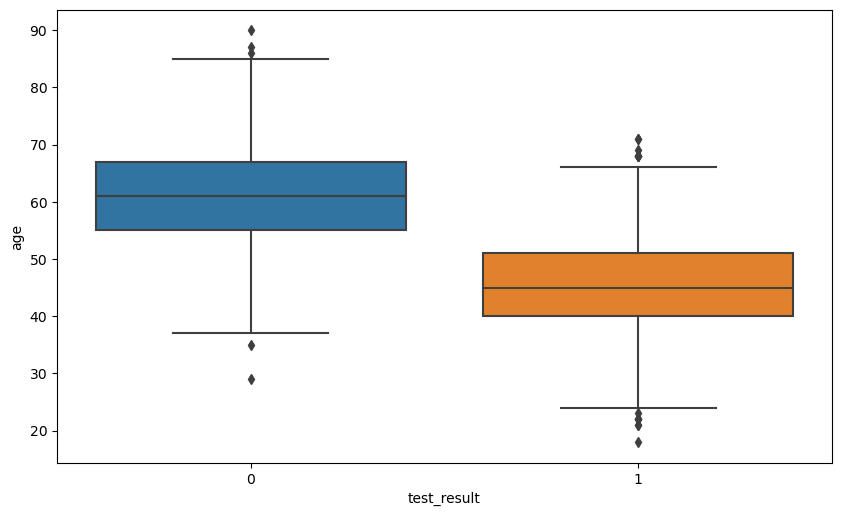

In [46]:
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x="test_result", y="age", data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

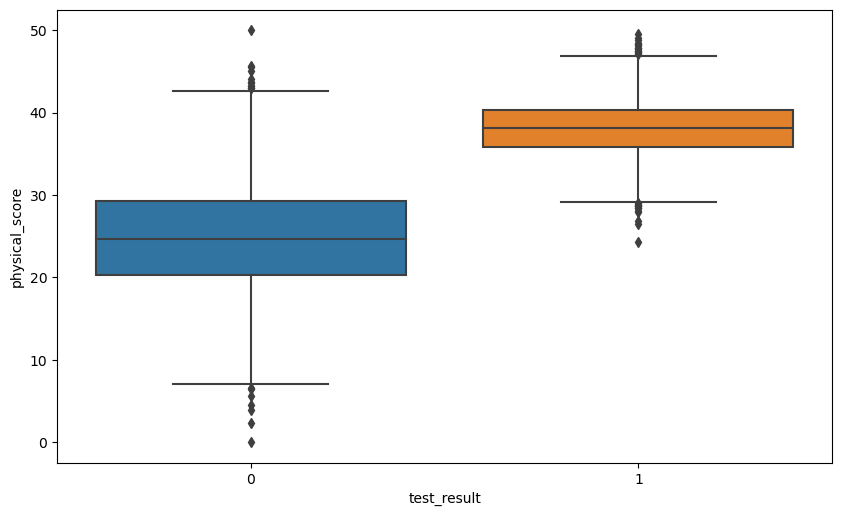

In [47]:
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x="test_result", y="physical_score", data=df)

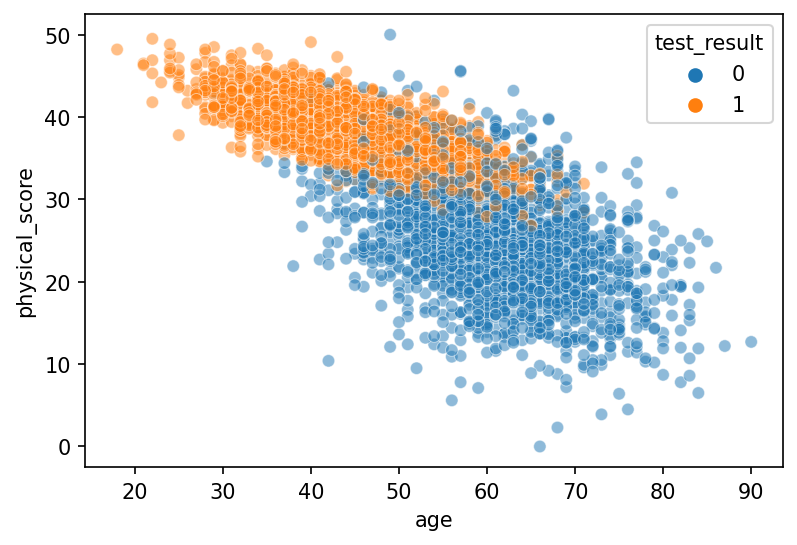

In [48]:
plt.figure(figsize=(6, 4), dpi=150)
sns.scatterplot(x="age", y="physical_score", data=df, hue="test_result", alpha=0.5);

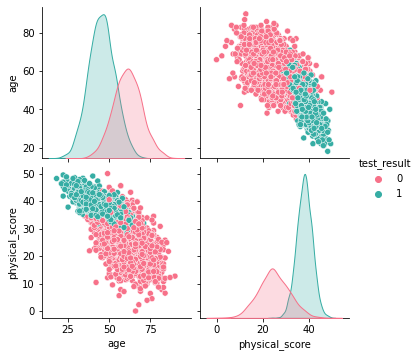

In [49]:
sns.pairplot(df, hue="test_result", diag_kind="kde", palette="husl")

<AxesSubplot:>

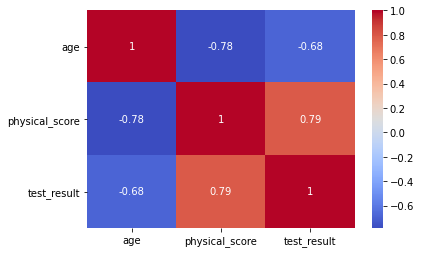

In [50]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

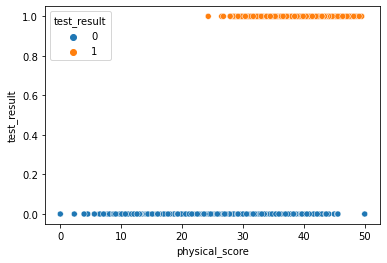

In [51]:
sns.scatterplot(x="physical_score", y="test_result", data=df, hue="test_result");

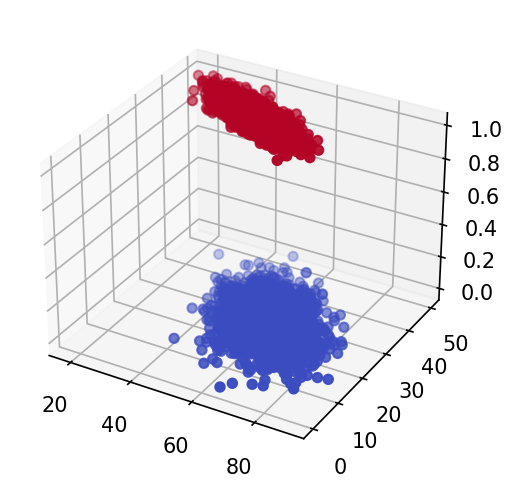

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 4), dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["age"], df["physical_score"], df["test_result"], c=df["test_result"], cmap="coolwarm")


In [53]:
X = df.drop(["test_result"], axis=1)
y = df["test_result"]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [57]:
# As the age increases (-0.9495), the probability of passing the test decreases. [Weaker predictor]
# As the physical score increases (+3.4599), the probability of passing the test increases. [Stronger predictor]
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [66]:
accuracy_score(y_test, y_pred)

0.93

In [67]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

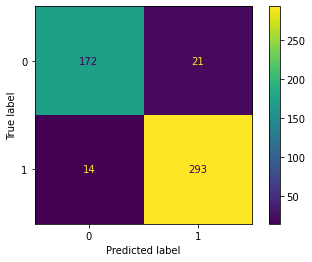

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [71]:
len(y_test)

500

# Precision



# Recall


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
precision_score(y_test, y_pred)

0.9331210191082803

In [76]:
recall_score(y_test, y_pred)

0.9543973941368078

In [77]:
f1_score(y_test, y_pred)

0.9436392914653785

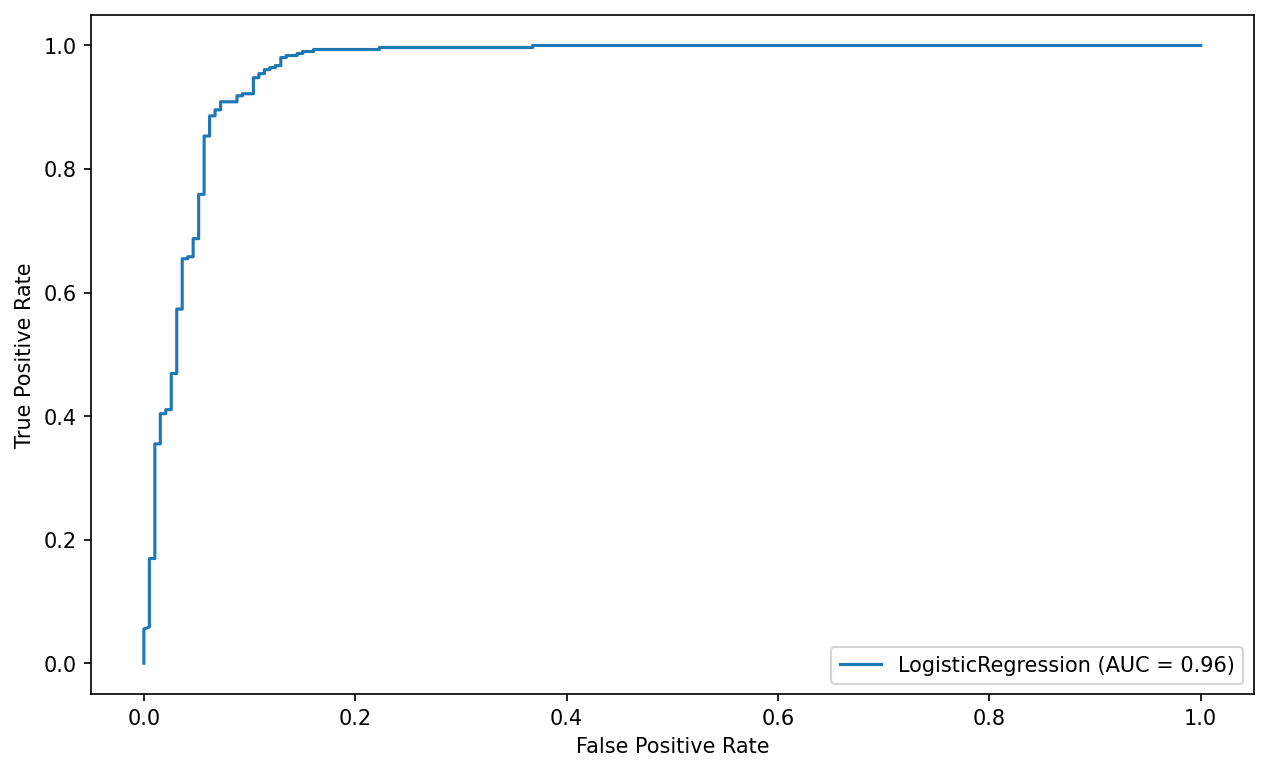

In [84]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
plot_roc_curve(log_model, scaled_X_test, y_test, ax=ax)

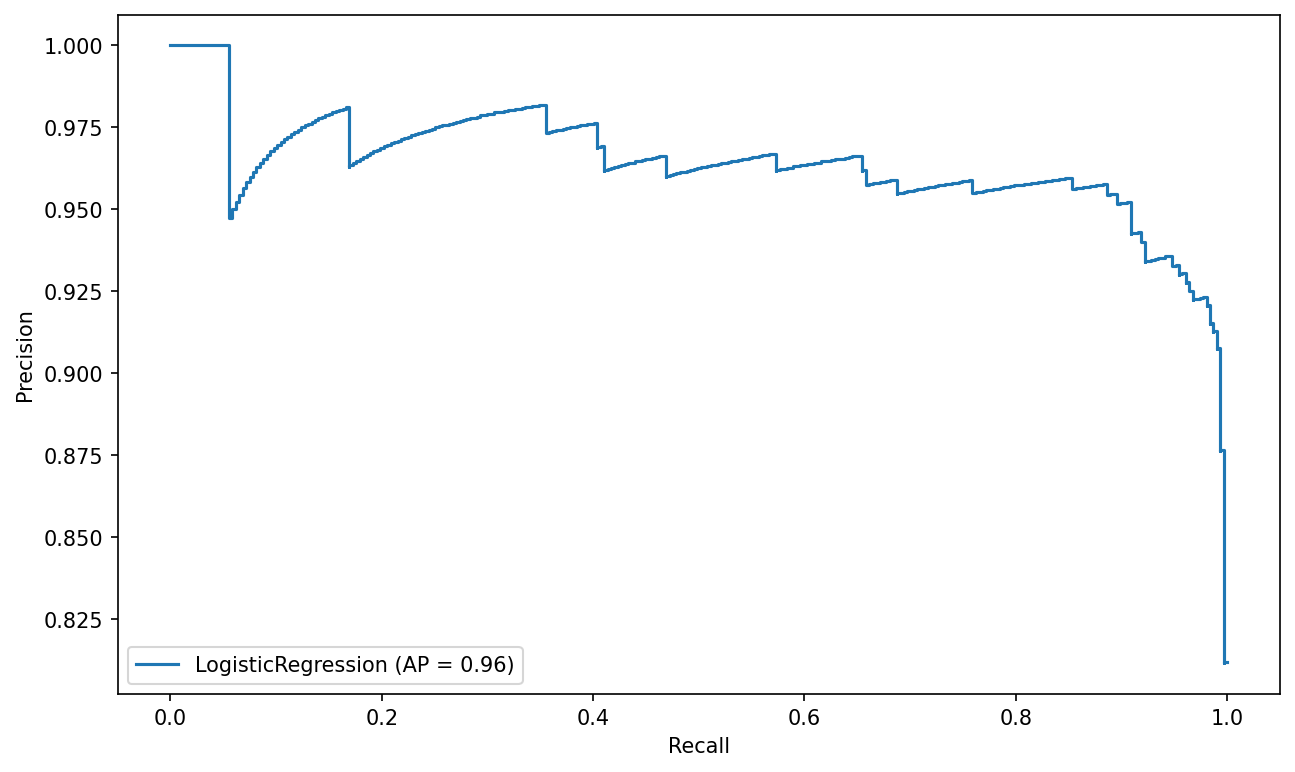

In [86]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
plot_precision_recall_curve(log_model, scaled_X_test, y_test, ax=ax)

In [87]:
log_model.predict_proba(scaled_X_test)[0]


array([0.02384343, 0.97615657])

In [88]:
y_test[0]


1